In [2]:
import yfinance as yf
import numpy
from backtesting import Backtest, Strategy #pip install backtesting
from backtesting.lib import crossover,plot_heatmaps
import pandas_ta as ta
import talib 
###
from ipynb.fs.full.watchlist import Watchlist #pip install ipynb defs (class or function); full (all)

C:\Users\JulioIsaacMR\anaconda3\Lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [3]:
data=yf.download(tickers = 'BTC-USD', start='2014-09-23', end = '2024-03-01') #daily
data.head(10)

C:\Users\JulioIsaacMR\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800
2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300
2014-09-28,399.471008,401.016998,374.332001,377.181000,377.181000,23613300
2014-09-29,376.928009,385.210999,372.239990,375.467010,375.467010,32497700
2014-09-30,376.088013,390.976990,373.442993,386.944000,386.944000,34707300
2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400


[i] Loaded BTC[D]: BTC_D.csv


,open,high,low,close,volume,SMA_10,SMA_20,SMA_50,SMA_200,VOL_SMA_20
date,,,,,,,,,,
2020-10-02,100.0800,100.0800,100.0500,100.0550,87090.0,NaN,NaN,NaN,NaN,NaN
2020-10-05,100.0300,100.0400,99.9950,99.9950,10725.0,NaN,NaN,NaN,NaN,NaN
2020-10-06,100.0100,100.0300,100.0100,100.0300,10080.0,NaN,NaN,NaN,NaN,NaN
2020-10-07,99.9500,99.9600,99.9200,99.9200,6350.0,NaN,NaN,NaN,NaN,NaN
2020-10-08,99.9900,99.9950,99.9717,99.9950,650.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-12,92.6511,92.6511,92.5061,92.5061,291.0,92.14395,92.426025,91.390006,91.222830,412.80
2024-01-16,92.2500,92.2500,92.1849,92.1849,239.0,92.12012,92.398770,91.446320,91.224679,371.45
2024-01-17,91.9100,91.9287,91.9100,91.9287,1204.0,92.08899,92.362450,91.493402,91.224944,431.05


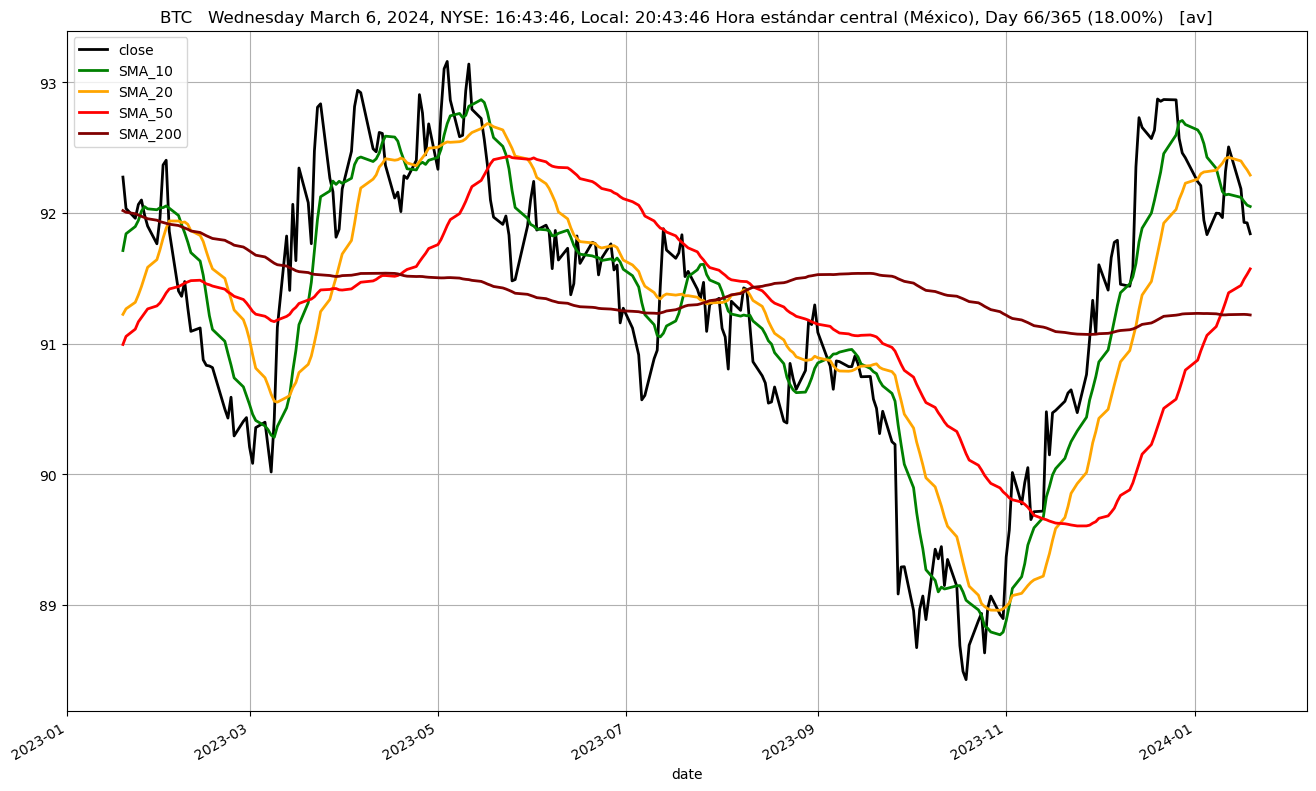

In [4]:
data_source = "av"
watch = Watchlist(["BTC"], ds_name=data_source, timed=False)
watch.load("BTC", plot=True)

In [5]:
data=data/10e8
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-23,4.020920e-07,4.415570e-07,3.961970e-07,4.357910e-07,4.357910e-07,0.045100
2014-09-24,4.357510e-07,4.361120e-07,4.211320e-07,4.232050e-07,4.232050e-07,0.030628
2014-09-25,4.231560e-07,4.235200e-07,4.094680e-07,4.115740e-07,4.115740e-07,0.026814
2014-09-26,4.114290e-07,4.149380e-07,4.000090e-07,4.044250e-07,4.044250e-07,0.021461
2014-09-27,4.035560e-07,4.066230e-07,3.973720e-07,3.995200e-07,3.995200e-07,0.015029
...,...,...,...,...,...,...
2024-02-25,5.156521e-05,5.195003e-05,5.130617e-05,5.173324e-05,5.173324e-05,15.413239
2024-02-26,5.173054e-05,5.493818e-05,5.093103e-05,5.452240e-05,5.452240e-05,34.074412
2024-02-27,5.451936e-05,5.753784e-05,5.448420e-05,5.708537e-05,5.708537e-05,49.756832


In [6]:
class A(Strategy): 
    emaF=10
    emaS=55
    
    def init(self):

        
        self.emaFast = self.I(talib.EMA,self.data.Close,self.emaF)
        self.emaSlow = self.I(talib.EMA,self.data.Close,self.emaS)
        
    def next(self):
        
        if crossover(self.emaFast,self.emaSlow):
            self.buy()
            
        elif crossover(self.emaSlow,self.emaFast):
            self.sell()
            
bt = Backtest(data,A,exclusive_orders=True) #10000 usd default


In [6]:
class SimpleBuy(Strategy):
    def init(self):
        pass
    
    def next(self):
        price=self.data.Close[-1]
        
        if self.orders:
            return
        
        if self.position.si_long:
            return
        
        self.buy(limit=price*1.05,sl=price,tp=price*1.1)
bt = Backtest(data,SimpleBuy)

In [7]:
class RSIcross(Strategy):
  
  rsi_period = 16
  slPercent = 0.95

  def init(self):
    self.rsi = self.I(talib.RSI,self.data.Close,self.rsi_period)

  def next(self):
    price = self.data.Close[-1]

    if self.rsi[-1] < 30:
      self.position.close()

    if self.position.is_long:
      return
    
    
    self.buy(sl = price * self.slPercent)

bt = Backtest(data,RSIcross)

In [8]:
stats=bt.run()
stats

Start                     2014-09-23 00:00:00
End                       2024-02-29 00:00:00
Duration                   3446 days 00:00:00
Exposure Time [%]                   99.477807
Equity Final [$]                888620.263379
Equity Peak [$]                   952207.3315
Return [%]                        8786.202634
Buy & Hold Return [%]            13943.058462
Return (Ann.) [%]                   60.822926
Volatility (Ann.) [%]              116.040095
Sharpe Ratio                         0.524154
Sortino Ratio                        1.423975
Calmar Ratio                         0.723865
Max. Drawdown [%]                  -84.025179
Avg. Drawdown [%]                  -13.268842
Max. Drawdown Duration     1080 days 00:00:00
Avg. Drawdown Duration       73 days 00:00:00
# Trades                                  429
Win Rate [%]                        47.086247
Best Trade [%]                     600.681594
Worst Trade [%]                      -5.89064
Avg. Trade [%]                    

In [8]:
stats,heat = bt.optimize(emaF=range(5,15,1)
                         ,emaS=range(45,65,1),
                         maximize='Return [%]',
                         return_heatmap=True
                        )

stats

  0%|          | 0/8 [00:00<?, ?it/s]

Start                     2014-09-23 00:00:00
End                       2024-02-29 00:00:00
Duration                   3446 days 00:00:00
Exposure Time [%]                   97.737163
Equity Final [$]               4998150.046211
Equity Peak [$]                4998598.323649
Return [%]                       49881.500462
Buy & Hold Return [%]            13943.058462
Return (Ann.) [%]                   93.096632
Volatility (Ann.) [%]              132.334157
Sharpe Ratio                         0.703497
Sortino Ratio                        2.358958
Calmar Ratio                         1.461294
Max. Drawdown [%]                   -63.70833
Avg. Drawdown [%]                  -10.395559
Max. Drawdown Duration      548 days 00:00:00
Avg. Drawdown Duration       39 days 00:00:00
# Trades                                   52
Win Rate [%]                        44.230769
Best Trade [%]                     855.417611
Worst Trade [%]                    -25.356285
Avg. Trade [%]                    

In [9]:
bt.plot()

C:\Users\JulioIsaacMR\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\JulioIsaacMR\anaconda3\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\JulioIsaacMR\anaconda3\Lib\site-packages\backtesting\_plotting.py:456: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample_rule, label='left')


GridPlot(id='p1309', ...)

In [10]:
plot_heatmaps(heat)

GridPlot(id='p1383', ...)

In [11]:
stats["_strategy"]

<Strategy A(emaF=14,emaS=63)>